In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [13]:
df["Credit_History"].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [15]:
df["Loan_Amount_Term"].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

# checking outliers

In [18]:
df["Education"]=np.where(df["Education"]=="Graduate",1,0) 
df["Self_Employed"]=np.where(df["Self_Employed"]=="Yes",1,0) 
df["Loan_Status"]=np.where(df["Loan_Status"]=="Y",1,0)  



In [20]:
# Function for Checking Outliers
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

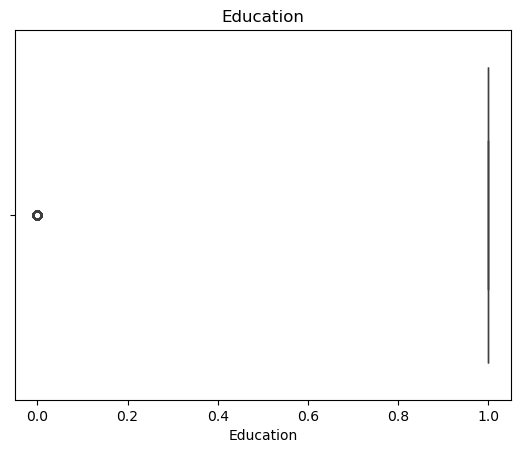

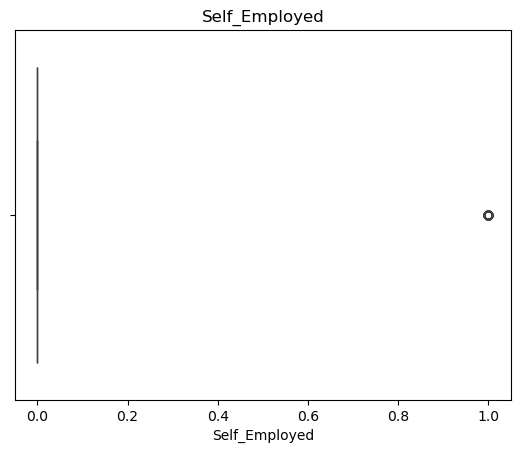

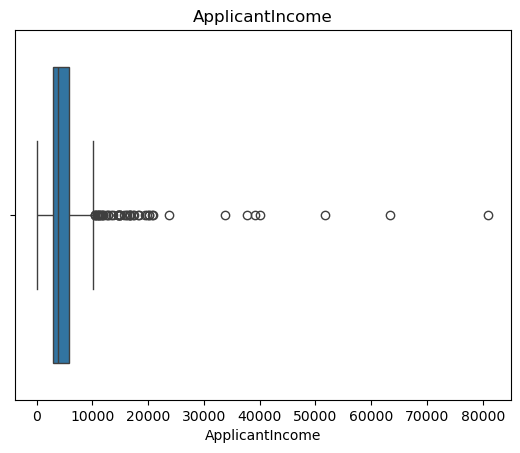

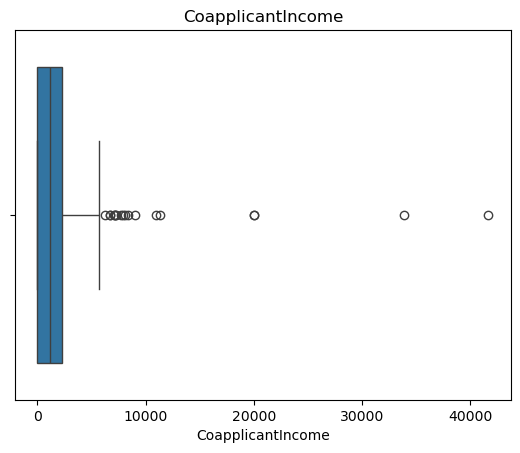

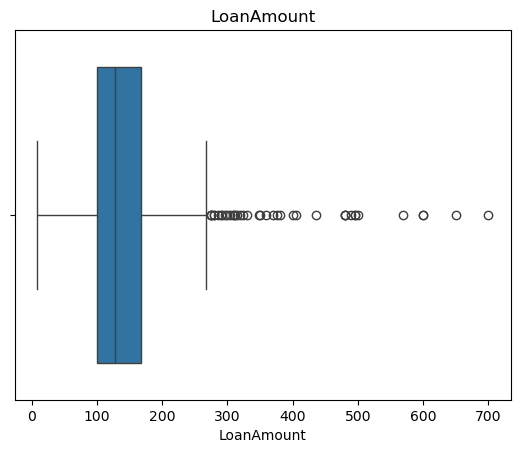

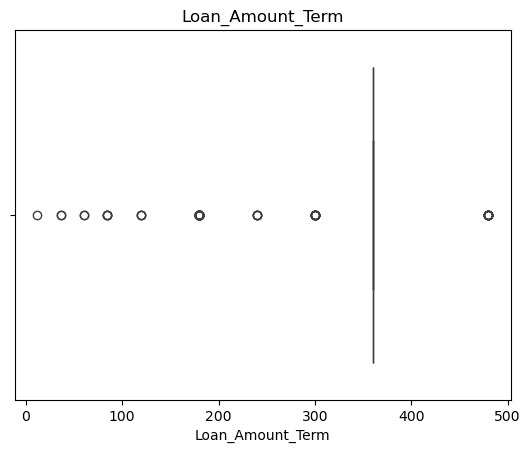

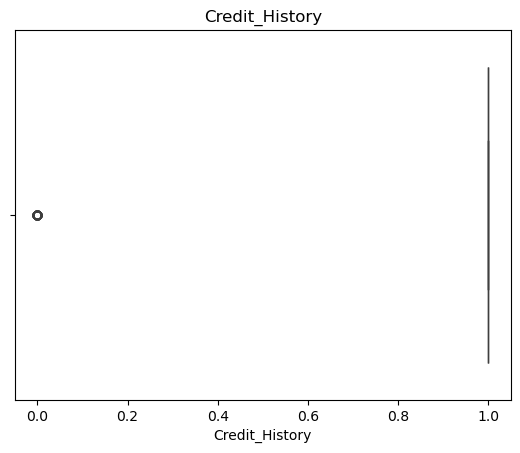

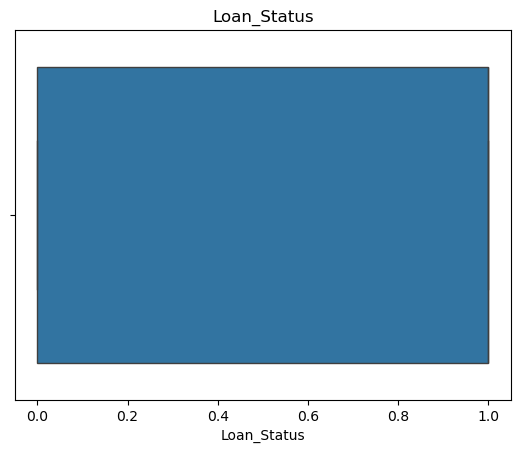

In [22]:
outliers(df)

In [27]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    low = q1 - (1.5 * IQR)
    high = q3 + (1.5 * IQR)
    
    # Clip the values to the lower and upper bounds
    df[column] = np.clip(df[column], low, high)


In [29]:
remove_outliers(df,"ApplicantIncome") 
remove_outliers(df,"CoapplicantIncome") 
remove_outliers(df,"LoanAmount")  
remove_outliers(df,"Self_Employed")  
remove_outliers(df,"Education")  






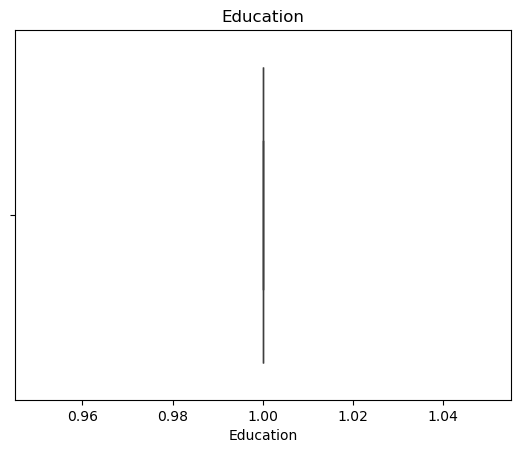

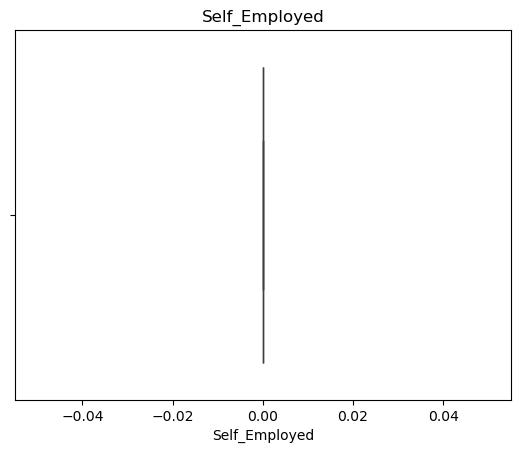

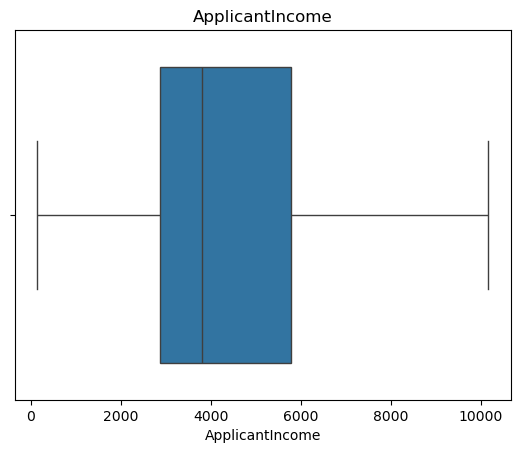

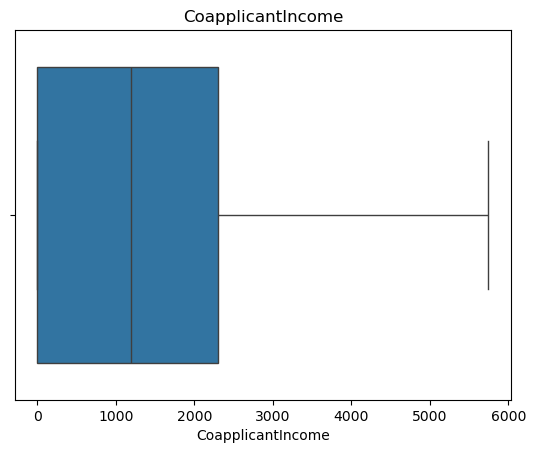

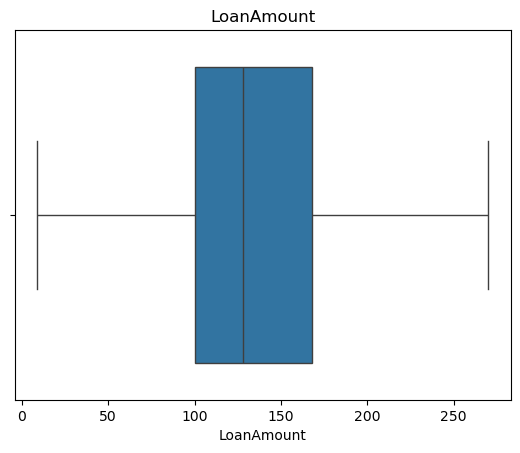

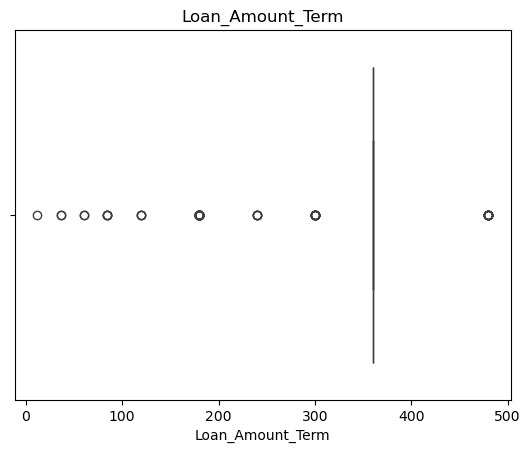

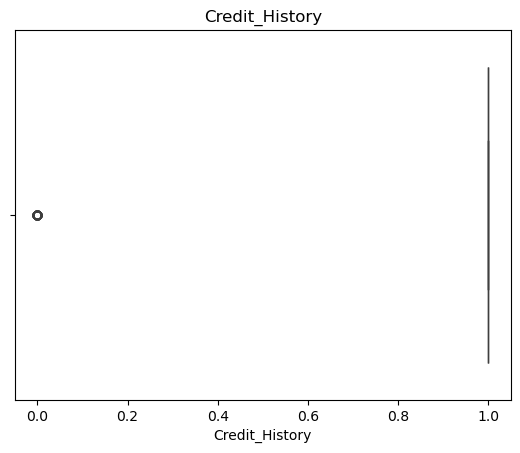

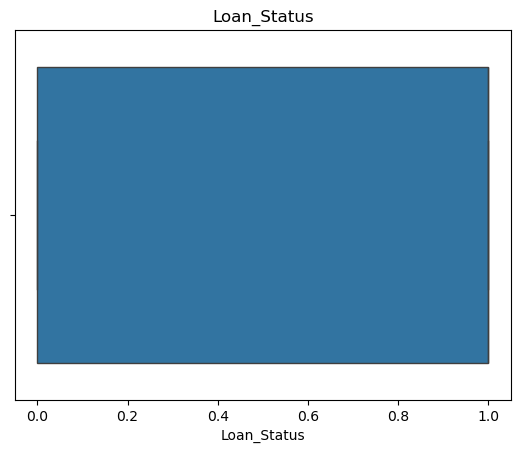

In [31]:
outliers(df)

# Modelling

In [71]:
df1=df.select_dtypes(include=[int,float])


In [100]:
df1.isnull().sum()

Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [102]:
df1.dropna(inplace=True)

In [104]:
y=df1["Loan_Status"]
x=df1.drop(columns="Loan_Status")

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=88)

In [108]:
# Shape of Dataset on variable
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(423, 7)
(423,)
(106, 7)
(106,)


In [110]:
from sklearn.linear_model import LinearRegression

# Classification of data 

In [112]:
lr=LinearRegression()

In [114]:
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
print("Train Accuracy",lr.score(x_train,y_train))
print("Test Accuracy",lr.score(x_test,y_test))


Train Accuracy 0.2965804864451165
Test Accuracy 0.3114527392543819


## Decision tree

In [90]:
dt=DecisionTreeClassifier(random_state=88)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=88)

In [92]:
print("Train Accuracy",dt.score(x_train,y_train))
print("Test Accuracy",dt.score(x_test,y_test))


Train Accuracy 0.9898167006109979
Test Accuracy 0.7398373983739838


In [189]:
# Looping to generate various accuracy models
md=[18,20,22,24,26,28]
mss=[80,90,100,110,120]
for i in md:
    for j in mss:
        dt=DecisionTreeClassifier(max_depth=i,
                                  min_samples_split=j,
                                  min_samples_leaf=1,
                                  random_state=88)
        dt.fit(x_train,y_train)
        print("max_depth ",i," min_samples_split",j)
        print("+++++++++++++++++++++++++++++++++++++++++++++++")
        print("Accuracy train",dt.score(x_train,y_train))
        print("Accuracy test",dt.score(x_test,y_test))
        

max_depth  18  min_samples_split 80
+++++++++++++++++++++++++++++++++++++++++++++++
Accuracy train 0.8411405295315683
Accuracy test 0.7398373983739838
max_depth  18  min_samples_split 90
+++++++++++++++++++++++++++++++++++++++++++++++
Accuracy train 0.8391038696537678
Accuracy test 0.7317073170731707
max_depth  18  min_samples_split 100
+++++++++++++++++++++++++++++++++++++++++++++++
Accuracy train 0.8329938900203666
Accuracy test 0.7317073170731707
max_depth  18  min_samples_split 110
+++++++++++++++++++++++++++++++++++++++++++++++
Accuracy train 0.8329938900203666
Accuracy test 0.7317073170731707
max_depth  18  min_samples_split 120
+++++++++++++++++++++++++++++++++++++++++++++++
Accuracy train 0.8309572301425662
Accuracy test 0.7317073170731707
max_depth  20  min_samples_split 80
+++++++++++++++++++++++++++++++++++++++++++++++
Accuracy train 0.8411405295315683
Accuracy test 0.7398373983739838
max_depth  20  min_samples_split 90
+++++++++++++++++++++++++++++++++++++++++++++++
Accurac

In [211]:
df2=pd.read_csv("test_lAUu6dG.csv")
df2["Education"]=np.where(df2["Education"]=="Graduate",1,0) 
df2["Self_Employed"]=np.where(df2["Self_Employed"]=="Yes",1,0) 
#df["Loan_Status"]=np.where(df["Loan_Status"]=="Y",1,0)  

In [213]:
df3=df2.select_dtypes(include=[int,float])

In [215]:
df3

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,5720,0,110.0,360.0,1.0
1,1,0,3076,1500,126.0,360.0,1.0
2,1,0,5000,1800,208.0,360.0,1.0
3,1,0,2340,2546,100.0,360.0,NaN
4,0,0,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...
362,0,1,4009,1777,113.0,360.0,1.0
363,1,0,4158,709,115.0,360.0,1.0
364,1,0,3250,1993,126.0,360.0,NaN
365,1,0,5000,2393,158.0,360.0,1.0


In [217]:
ff=pd.DataFrame(df3)


In [221]:
df3["predict_y"]=dt.predict(ff)

In [223]:
df3

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,predict_y
0,1,0,5720,0,110.0,360.0,1.0,1
1,1,0,3076,1500,126.0,360.0,1.0,1
2,1,0,5000,1800,208.0,360.0,1.0,1
3,1,0,2340,2546,100.0,360.0,NaN,1
4,0,0,3276,0,78.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...
362,0,1,4009,1777,113.0,360.0,1.0,1
363,1,0,4158,709,115.0,360.0,1.0,1
364,1,0,3250,1993,126.0,360.0,NaN,1
365,1,0,5000,2393,158.0,360.0,1.0,1


In [227]:
np.where(df3["predict_y"]==1)

(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  14,
         15,  16,  17,  18,  20,  21,  22,  23,  24,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  52,  53,  54,  56,  57,  59,
         60,  61,  62,  64,  65,  68,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  81,  83,  87,  88,  89,  90,  91,  92,  93,  95,
         96,  98,  99, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111,
        113, 114, 115, 120, 121, 122, 125, 127, 128, 129, 130, 132, 133,
        134, 135, 136, 137, 138, 139, 141, 143, 145, 146, 148, 149, 150,
        151, 152, 154, 156, 157, 158, 159, 160, 162, 163, 164, 167, 170,
        171, 172, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
        186, 187, 188, 189, 190, 191, 194, 195, 197, 199, 200, 201, 202,
        203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216,
        217, 218, 219, 220, 222, 223, 225, 226, 228

In [229]:
df5=pd.read_csv("sample_submission_49d68Cx.csv")

In [231]:
df5

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N
